In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, confusion_matrix, classification_report

C:\Users\jigna\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read in train data
df = pd.read_csv('data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


**Data Preprocessing**

In [4]:
# Checking if there are any nulls in data
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
# Statistics for the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8371.0,41.197467,11.809300,18.0,32.0,39.0,49.0,95.0
balance,8371.0,1517.811134,3225.312218,-3058.0,116.0,532.0,1694.0,81204.0
day,8371.0,15.588460,8.406768,1.0,8.0,15.0,21.0,31.0
duration,8371.0,372.898698,346.706743,2.0,137.0,255.0,504.0,3284.0
campaign,8371.0,2.512603,2.734037,1.0,1.0,2.0,3.0,63.0
pdays,8371.0,49.911958,107.308417,-1.0,-1.0,-1.0,2.0,854.0
previous,8371.0,0.823677,2.315285,0.0,0.0,0.0,1.0,58.0


In [6]:
# Statistics for the categorical data
df.describe(include=['bool','object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,8371,8371,8371,8371,8371,8371,8371,8371,8371,8371
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,1923,4744,4113,8244,4354,7250,6041,2135,6269,4428


In [7]:
# Create X dataframe
X = df.drop(columns=['deposit','duration'])
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,1,50,2,success
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,5,-1,0,unknown
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,3,263,2,failure
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,1,-1,0,unknown
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,2,251,6,failure


In [8]:
# Create Y outcome dataframe 
Y = df['deposit']

In [9]:
# Get a list of columns for one-hot encoding
ohe_cols = list(X.select_dtypes(include='object').columns.values)

# Drop education 
ohe_cols.remove('education')
ohe_cols

['job',
 'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [10]:
X = pd.get_dummies(X, prefix=ohe_cols, columns=ohe_cols, drop_first=True)
X.head()

,age,education,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,38,tertiary,127,14,1,50,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,41,primary,365,8,5,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,39,tertiary,2454,4,3,263,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,49,primary,6215,11,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,37,secondary,1694,29,2,251,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Perform Ordinal encoding on education
edu_enc = {'unknown': 0, 
          'primary': 1,
          'secondary': 2,
          'tertiary': 3}
X['education'] = X['education'].replace(edu_enc)

In [12]:
X.head()

,age,education,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,38,3,127,14,1,50,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,41,1,365,8,5,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,39,3,2454,4,3,263,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,49,1,6215,11,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,37,2,1694,29,2,251,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Label Encoding for outcome column since it is not numerical 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)

In [14]:
# value counts for outcome column
df['deposit'].value_counts()

no     4428
yes    3943
Name: deposit, dtype: int64

In [15]:
X.head()

,age,education,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,38,3,127,14,1,50,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,41,1,365,8,5,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,39,3,2454,4,3,263,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,49,1,6215,11,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,37,2,1694,29,2,251,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler() 
X = sc_X.fit_transform(X)

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier

# Reduce the number of features being used to avoid noise and overfitting 

test = SelectKBest(score_func=chi2, k=25)
fit = test.fit(X, Y)
X=test.fit_transform(X, Y)

In [19]:
len(X[0])

25

.Logisitc Regression is our base model

.Random Forest Classifier is our actual model

In [20]:
# Creating Logistice Regression and RandomForest Objects
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

lr = LogisticRegression()
rf = RandomForestClassifier()

**Cross Validation with Random Forest Classifier**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    # Create linear regression object
    clsr = RandomForestClassifier(max_depth=k)

    # Define k-fold cross validatation
    kfold = StratifiedKFold(n_splits=5)
    
    #res = cross_validate(clsr, X_train, y_train, cv=kfold, return_train_score=True)
    #display(res)
    summary = cross_val_score(clsr, X_train, y_train, cv=kfold)
    print("Mean cross-validation scores with k = {}: {:.3f}".format(k, summary.mean()))

Mean cross-validation scores with k = 1: 0.613
Mean cross-validation scores with k = 2: 0.643
Mean cross-validation scores with k = 3: 0.665
Mean cross-validation scores with k = 4: 0.677
Mean cross-validation scores with k = 5: 0.699
Mean cross-validation scores with k = 6: 0.706
Mean cross-validation scores with k = 7: 0.710
Mean cross-validation scores with k = 8: 0.719
Mean cross-validation scores with k = 9: 0.720
Mean cross-validation scores with k = 10: 0.718


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, Y, scoring='accuracy')
print(scores)

[0.68358209 0.69056153 0.65890084 0.66427718 0.67741935]


*************** Logistic Regression ***************

 Test Set Accuracy Score:  0.667462971810798 

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1129
           1       0.64      0.63      0.64       964

    accuracy                           0.67      2093
   macro avg       0.67      0.66      0.66      2093
weighted avg       0.67      0.67      0.67      2093



C:\Users\jigna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


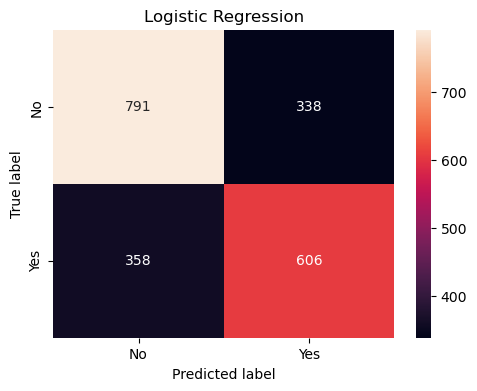

In [23]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
# Logistic Regression

lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print("*"*15,"Logistic Regression","*"*15)
print('\n Test Set Accuracy Score: ', accuracy_score(y_predict,y_test), '\n')
print(classification_report(y_test,y_predict))
      
cm = confusion_matrix(y_test, y_predict) 

# # Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = ['No','Yes',], columns = ['No','Yes'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, fmt='d', annot=True)
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

*************** Random Forest ***************

 Test Set Accuracy Score:  0.7209746774964166 

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1129
           1       0.72      0.64      0.68       964

    accuracy                           0.72      2093
   macro avg       0.72      0.71      0.72      2093
weighted avg       0.72      0.72      0.72      2093



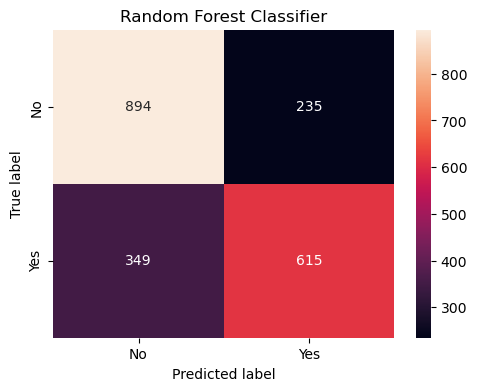

In [24]:
# Random Forest Classifier

rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
print("*"*15,"Random Forest","*"*15)
print('\n Test Set Accuracy Score: ', accuracy_score(y_predict,y_test), '\n')
print(classification_report(y_test,y_predict))
      
cm = confusion_matrix(y_test, y_predict) 

# # Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = ['No','Yes',], columns = ['No','Yes'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, fmt='d', annot=True)
plt.title('Random Forest Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()